<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS_fed/blob/main/Lez24032021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p-value statistic and null rejection hypotesis
metodi dominanti anche oggi. c'è molto scetticismo sul p-value statistic method.


come fisici sperimentali vogliamo capire la probabilità della fisica avendo i dati nelle scienze osservazionali, o scienze come High Energy Physics,hanno dati la cui interpretazione è difficle. 
CALCOALRE LA PROABILITÀ DELLA FISICA CONSCENDO I DATI, CI FOCALIZZIAMO SULLA


NULL HYPOTESIS REJECTION TESTING

Gaussiana simmetrica, la media è il centro della distribuzione. Each side of the mean contained in 1-std contain 34.1% of the data.
 
NHRT rely on the falsifiability concept. 
Under the hypotesi (if the model si true) comethign shoud happen. This has a low probability of happening. I cannot rule out anything, because of the sthocasticity of nature. 

How low is "low"? Depend on the physics we are doing. 
HEP typically have 5-sigma threshold. 
In general we are satify with 3-sigma detetion. 
It's very important to CHOOSE THIS THRESHOLD MUST BE CHOOSE AT THE BEGINNING OF THE EXPERIMENT, BECAUSE THERE COULD BE THE TENTATION TO MODIFY THIS THREsOLD DURING DATA ANLISYS. I cannot adapt my threshold on the data, threshold must be not chanced, whathever append.

The trcick: we don't want to falsify our idea in general. 
In NHRT we create a null hypotsis that include everything but the prediction and we try to falsify this hypotesis. 
FORMULATE THE PREDICTION BASED ON WHAT WE THING THE REALITY WORK:
This is my alternative hyptesis. 

It is important to include al lpossible outcome in P(A)+ P(\bar A) = 1.
I want to falsify what i don't believe hold.
I want to create a null hypotesis


PIVOTAL QUNTITIES ARE MEASURABLE QUNATITIES THA HAS TO DO WITH THE MEASUREMENT
they are also qunatites that under the null hypotesis follow a known distribution. 
How we choose the pivotal quantites. 
The sensitivity of the test in whether the test is powerful to reject null hypotesys within the noisy data. 



We will use pandas package to read out data from a url and we will make some data manipulation.
THE Z VALUE IS DISTRIBUTE AS A STANDARD MODEL DISTRIBUTION. The maen is 0 for a standard normal distribution. 

Z is zero if the differences of the mean is zero. In additin Z grwoth w\ the ... ho perso il segno. 

t-test is an alternative to the Z test. 

K-S test very common used in physics, more than t and Z test that are used on social science and not in physics. 
At minus infinity the cumulative distribution is 0. In fct what fraction of number is less than -infinity? 0.
As this, at +inifinity, cumulative distribution tends to 1.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#link from wich we take the data https://raw.githubusercontent.com/fedhere/DSPS/master/labs/1865331.csv

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/labs/1865331.csv")
df

,STATION,NAME,DATE,PRCP,SNOW,SNWD,WESD,WESF
0,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-01,0.28,NaN,0.0,NaN,NaN
1,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-02,0.00,0.0,NaN,NaN,NaN
2,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-03,0.00,0.0,NaN,NaN,NaN
3,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-04,0.00,0.0,NaN,NaN,NaN
4,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-05,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3533,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2019-09-04,0.00,0.0,NaN,NaN,NaN
3534,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2019-09-05,0.00,0.0,NaN,NaN,NaN
3535,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2019-09-06,0.00,0.0,NaN,NaN,NaN
3536,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2019-09-07,0.02,NaN,NaN,NaN,NaN


In [6]:
#pd.read_csv returna value
type(df)

pandas.core.frame.DataFrame

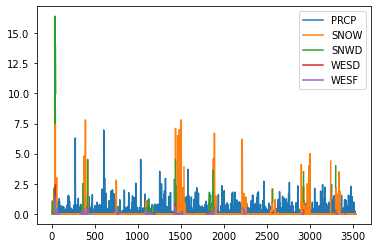

In [7]:
df.plot()   #it can plot itself

In [10]:
df.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,WESD,WESF
0,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-01,0.28,NaN,0.0,NaN,NaN
1,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-02,0.00,0.0,NaN,NaN,NaN
2,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-03,0.00,0.0,NaN,NaN,NaN
3,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-04,0.00,0.0,NaN,NaN,NaN
4,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-05,0.00,NaN,NaN,NaN,NaN
5,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-06,0.00,0.0,NaN,NaN,NaN
6,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-07,0.00,0.0,NaN,NaN,NaN
7,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-08,0.05,1.1,1.0,0.1,0.1
8,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-09,0.00,0.0,0.0,NaN,NaN
9,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-10,0.00,0.0,NaN,NaN,NaN


In [13]:
#i can refer to row and colums with their name
df.columns #for clumns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF'], dtype='object')

In [15]:
df.index #to show the row

RangeIndex(start=0, stop=3538, step=1)

In [17]:
#I can refer to thing to with the name
df['STATION'] #core elemnt of dataframe df

0       US1DENC0010
1       US1DENC0010
2       US1DENC0010
3       US1DENC0010
4       US1DENC0010
           ...     
3533    US1DENC0010
3534    US1DENC0010
3535    US1DENC0010
3536    US1DENC0010
3537    US1DENC0010
Name: STATION, Length: 3538, dtype: object

In [18]:
type(df['STATION'])

pandas.core.series.Series

In [19]:
df.loc[3537]['STATION'] #location for row named 3537, and column named station

'US1DENC0010'

In [20]:
#if i know the location i can do
df.iloc[3537][0]

'US1DENC0010'

In [21]:
df.describe() #it can describe itself

,PRCP,SNOW,SNWD,WESD,WESF
count,3538.000000,2266.00000,216.000000,175.000000,256.000000
mean,0.137340,0.09594,1.026852,0.160571,0.073828
std,0.382174,0.64966,2.738447,0.457994,0.175507
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.070000,0.00000,0.350000,0.100000,0.100000
max,6.960000,12.30000,16.400000,2.400000,1.400000


In [26]:
#daytime funtionality 
#one of th entry is the date
#pandas is smart to figure itself out what is the date

df["DATE"] # equivalent to df.DATE, but df is not a dictionary

0       2010-01-01
1       2010-01-02
2       2010-01-03
3       2010-01-04
4       2010-01-05
           ...    
3533    2019-09-04
3534    2019-09-05
3535    2019-09-06
3536    2019-09-07
3537    2019-09-08
Name: DATE, Length: 3538, dtype: object

In [23]:
pd.to_datetime(df.DATE)

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
3533   2019-09-04
3534   2019-09-05
3535   2019-09-06
3536   2019-09-07
3537   2019-09-08
Name: DATE, Length: 3538, dtype: datetime64[ns]

In [27]:
#to convert some date to treat them with numpy i can do a list od numerical variable
listnumv = ["PRCP",	"SNOW",	"SNWD",	"WESD",	"WESF"]

In [28]:
type((df[listnumv].values))

numpy.ndarray

In [34]:
#READ THIS DATA AND ECTRACT ONLY THE DAY THAT ARE PASS 2019 AND SAY WHAT IS THE AMOUNT
#OF PRECIPITATION

#I CAN USE Z-TEST (USE 2-SIGMA LEVEL)
#pd.data funziona anche su una string
#pd.data sono numeri e quindi posso fare le operazioni con i numeri.
#posso usare una condizione come indice
#cioè " if pd.date>determinata data "

df19 = df[pd.to_datetime(df.DATE) >= pd.to_datetime('2019-01-01')]

In [35]:
df19.describe()

,PRCP,SNOW,SNWD,WESD,WESF
count,251.000000,148.000000,10.000000,5.000000,9.000000
mean,0.140398,0.107432,0.890000,0.120000,0.055556
std,0.326314,0.450108,1.366626,0.130384,0.072648
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.100000,0.000000
75%,0.100000,0.000000,1.525000,0.200000,0.100000
max,2.290000,3.500000,4.000000,0.300000,0.200000


In [36]:
#adesso dobbiamo fare Z test

In [37]:
df.describe()

,PRCP,SNOW,SNWD,WESD,WESF
count,3538.000000,2266.00000,216.000000,175.000000,256.000000
mean,0.137340,0.09594,1.026852,0.160571,0.073828
std,0.382174,0.64966,2.738447,0.457994,0.175507
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.070000,0.00000,0.350000,0.100000,0.100000
max,6.960000,12.30000,16.400000,2.400000,1.400000


In [38]:
#possiamo calcoalre Z come (X_population -media_sample)/..

In [44]:
z_test = ((df19.PRCP.mean()) - (df.PRCP.mean()))/(df.PRCP.std())

In [46]:
print(z_test)

0.008001852520072345


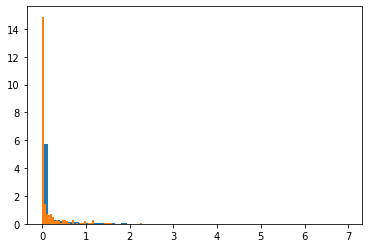

In [58]:
plt.hist(df.PRCP, bins = 50, density = True, range = (0,2))
plt.hist(df19.PRCP, bins = 50, density = True, range = (0,2))
plt.show()
#anno non particolarmente piovoso

In [60]:
pd.to_datetime(df.DATE)

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
3533   2019-09-04
3534   2019-09-05
3535   2019-09-06
3536   2019-09-07
3537   2019-09-08
Name: DATE, Length: 3538, dtype: datetime64[ns]

In [62]:
pd.to_datetime(df.DATE) > pd.to_datetime("2018-12-31") #prendere le date maggori di
                                                      #un determinata data
#possimao specificare il format della data usata con format

0       False
1       False
2       False
3       False
4       False
        ...  
3533     True
3534     True
3535     True
3536     True
3537     True
Name: DATE, Length: 3538, dtype: bool

In [63]:
samp = df.DATE[pd.to_datetime(df.DATE) > pd.to_datetime("2018-12-31")]

In [69]:
#pop = df.DATE[\tilde(fare una tilde)pd.to_datetime(df.DATE) > pd.to_datetime("2018-12-31")]

In [67]:
def z(pop,samp):
  return (pop.mean() - samp.mean()/ (np.stdev(pop()) / np.sqrt(len(samp)) ) )

In [ ]:
#il valore che otteniamo ha un alta probabilità di trovare nella null hypotesys.
#Quindi non siamo in grado di reigettare la null hypotesis. 2019 non particolarmente
#piovoso.